In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(r"C:\Users\KIRUBAK\Downloads\Bitcoin/bitcoin_price_Training-Training.csv")

In [5]:
df.head(3)

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"


In [6]:
df.shape

(1556, 7)

In [7]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1556 non-null   object 
 1   Open        1556 non-null   float64
 2   High        1556 non-null   float64
 3   Low         1556 non-null   float64
 4   Close       1556 non-null   float64
 5   Volume      1556 non-null   object 
 6   Market Cap  1556 non-null   object 
dtypes: float64(4), object(3)
memory usage: 85.2+ KB


Data Pre Processing

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1556.0,582.625328,523.137312,68.50,254.2875,438.600,662.4375,2953.22
High,1556.0,597.992847,542.992855,74.56,260.3275,447.560,674.5250,2999.91
Low,1556.0,567.851446,505.877401,65.53,248.8350,430.570,646.7350,2840.53
Close,1556.0,584.239396,525.904442,68.43,254.3200,438.855,663.4025,2958.11


In [10]:
df['Date'] = df['Date'].astype('datetime64[ns]')

In [11]:
df.dtypes

Date          datetime64[ns]
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume                object
Market Cap            object
dtype: object

In [12]:
df['Date'].min()

Timestamp('2013-04-28 00:00:00')

In [13]:
df['Date'].max()

Timestamp('2017-07-31 00:00:00')

In [14]:
df.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [15]:
df.duplicated().sum()

0

In [26]:
df.sort_index(ascending = False)

,Date,Open,High,Low,Close,Volume,Market Cap
1555,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
1554,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
1553,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
1552,2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
1551,2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
...,...,...,...,...,...,...,...
4,2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
3,2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"


In [38]:
# to reset the index, and it will added as column in our dataset
data = df.sort_index(ascending = False).reset_index()

In [42]:
# then we have to remove the index column from the dataset
data = data.drop(['index'], axis = 1)

In [43]:
data.head(3)

,Date,Open,High,Low,Close,Volume,Market Cap
0,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
1,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"


What is the change in price of the stack overtime?

In [44]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

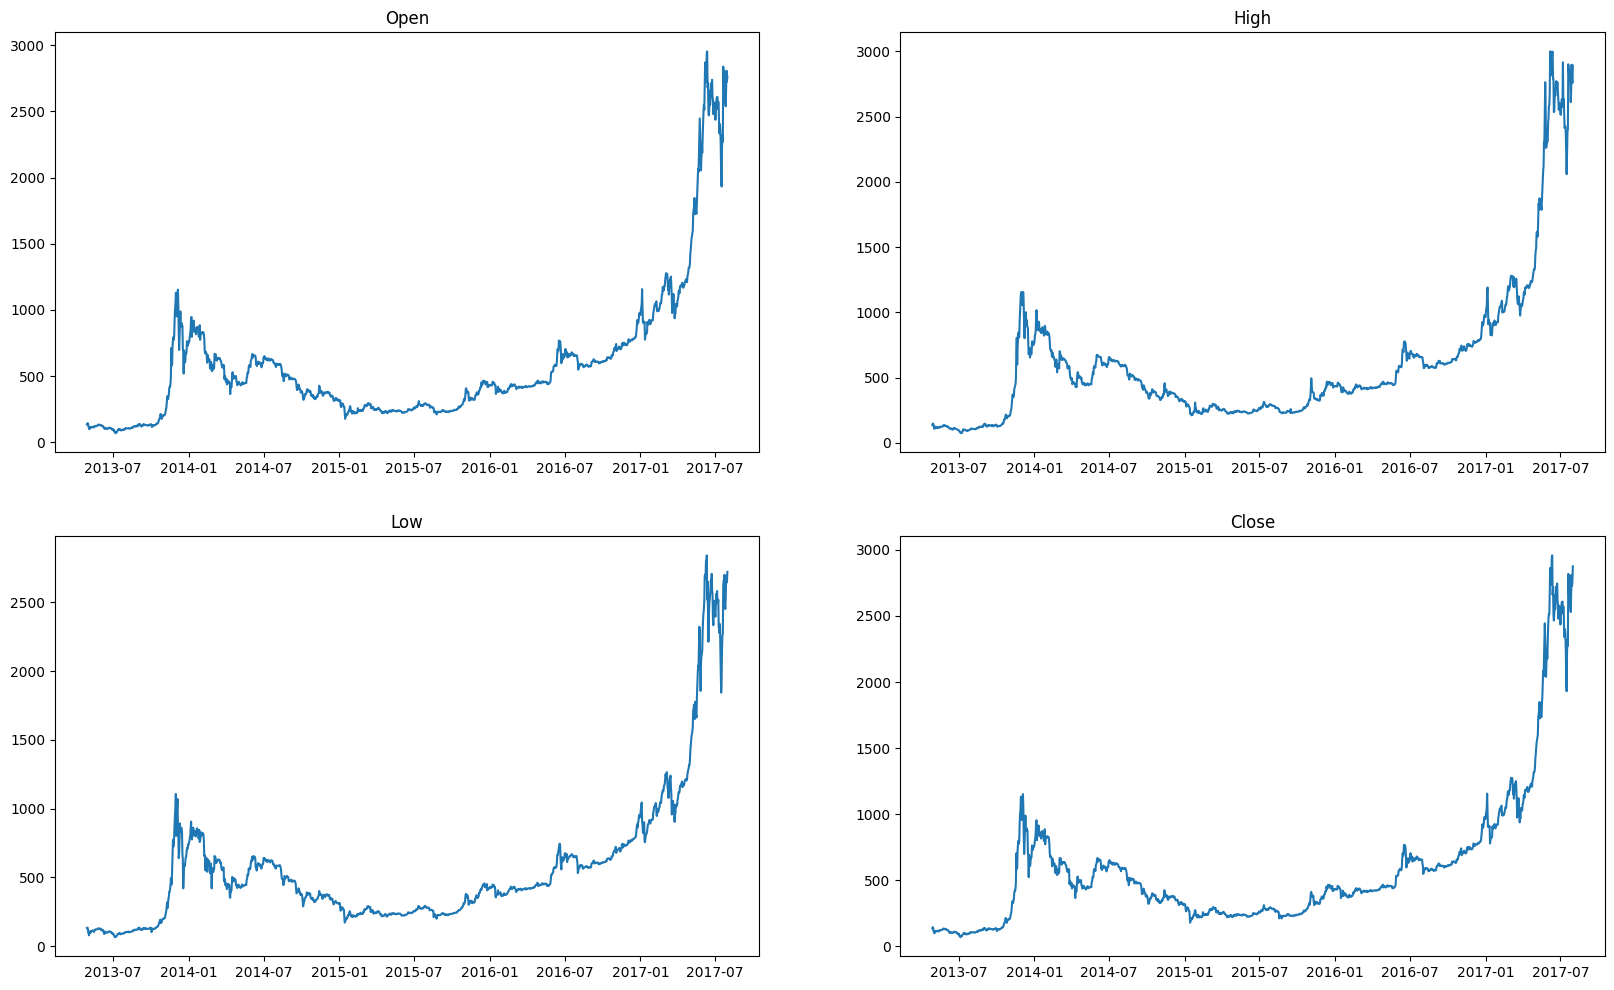

In [48]:
plt.figure(figsize = (20,12))
for index, col in enumerate(['Open','High','Low','Close'],1):
    plt.subplot(2,2,index)
    plt.plot(df['Date'], df[col])
    plt.title(col)

Analysing Open, High, Low, Clsoe values of Bitcoin

In [51]:
bitcoin_sample = data[:50]

In [53]:
# We use ploty for this candlestick for showing mutiple plot features
import chart_studio.plotly as pt
import plotly.graph_objs as go
import plotly.express as px

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [54]:
init_notebook_mode(connected = True)

In [63]:
trace = go.Candlestick(x = bitcoin_sample['Date'],
               high = bitcoin_sample['High'],
               open = bitcoin_sample['Open'],
               close = bitcoin_sample['Close'],
               low = bitcoin_sample['Low'])

In [66]:
candle_data = [trace]

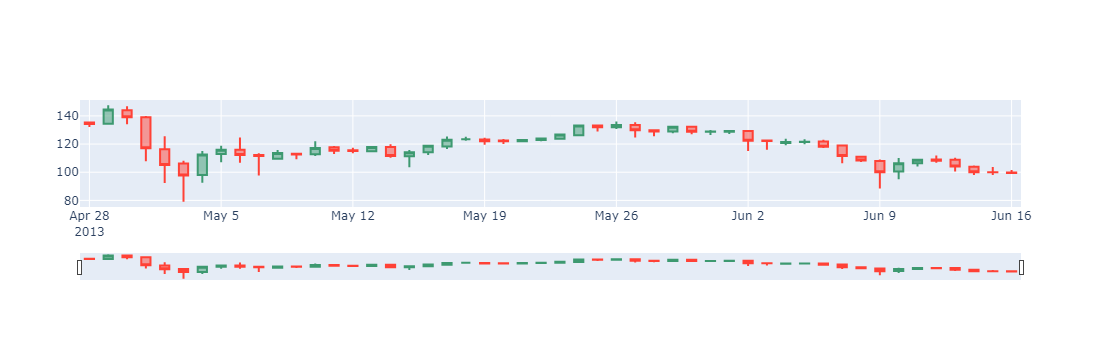

In [69]:
fig = go.Figure(data = candle_data)
fig

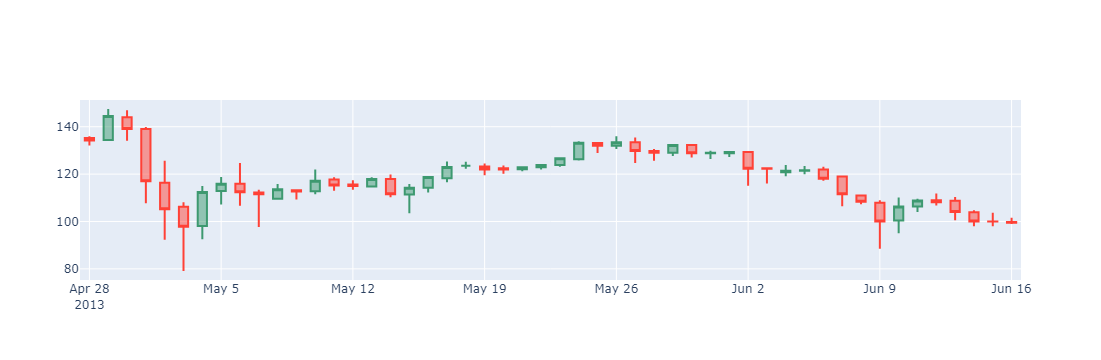

In [72]:
# if we dont want slider mean you can do that as well
# to add title we use layout
layout = {
    "title" : "Bitcoin Historical Price",
    "xaxis" : { "title" : "Date" } 
}
fig.update_layout(xaxis_rangeslider_visible = False)
fig.show()

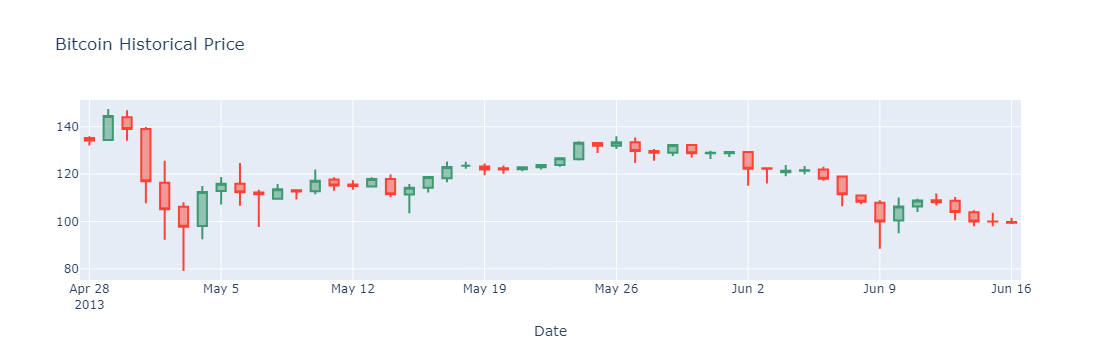

In [73]:
fig = go.Figure(data = candle_data,layout = layout)
fig.update_layout(xaxis_rangeslider_visible = False)
fig.show()

<Axes: >

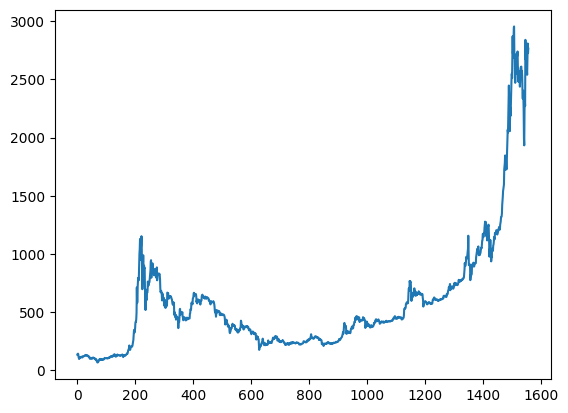

In [74]:
data['Open'].plot()

In [79]:
# In above plot the x axis is an coount if you want date in xaxis you need to update date as an index
data.set_index('Date',inplace = True)

In [78]:
data

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
...,...,...,...,...,...,...
2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"


<Axes: xlabel='Date'>

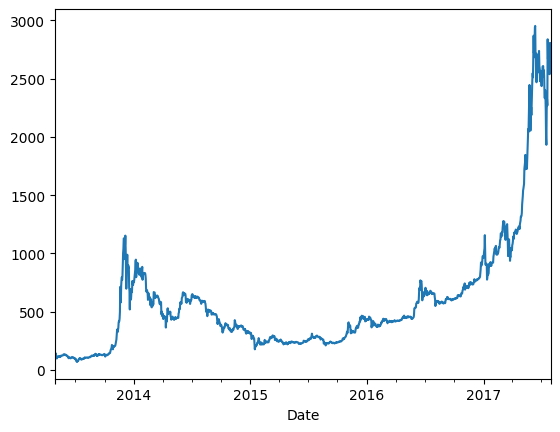

In [81]:
data['Open'].plot()

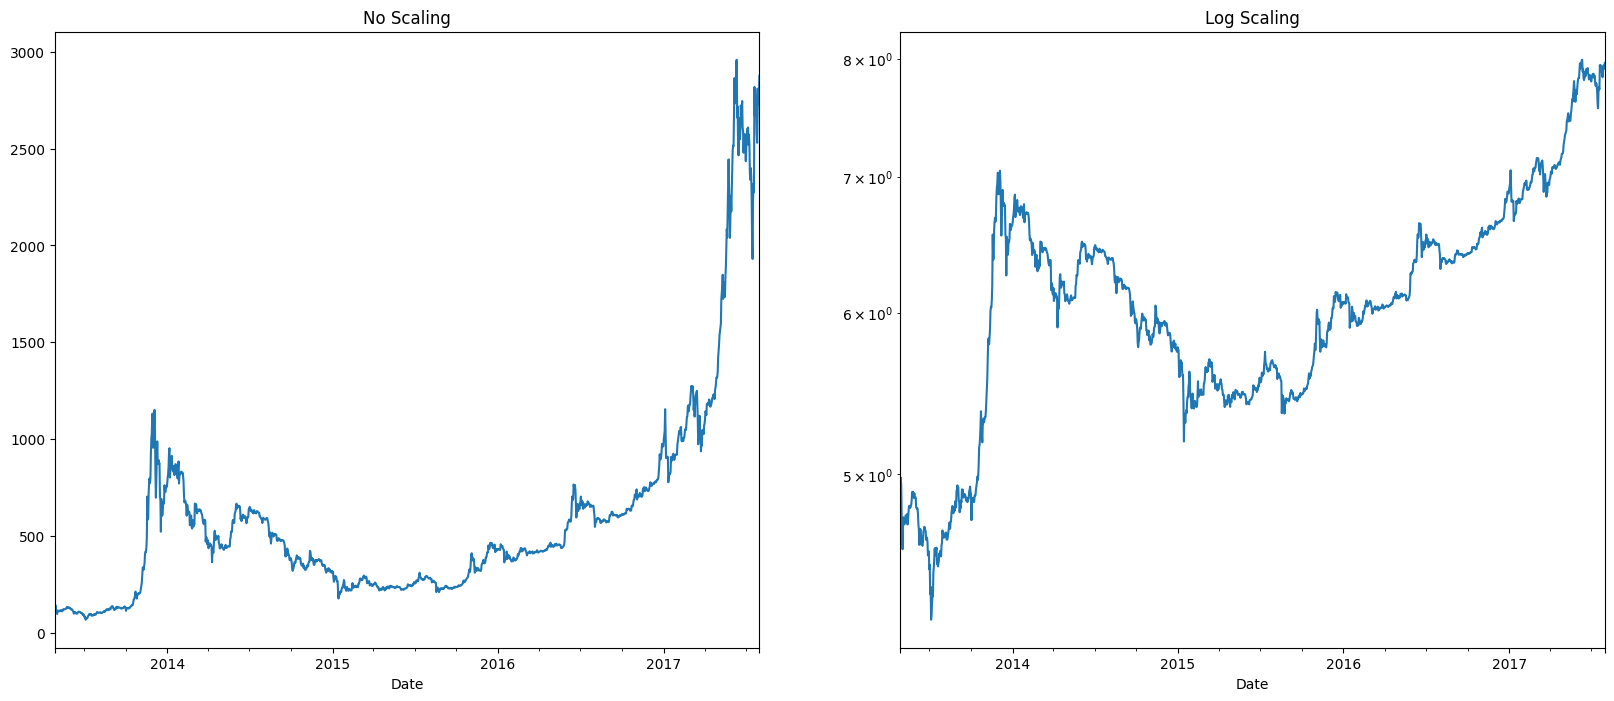

In [100]:
# we gonna put into a subplot
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
data['Close'].plot()
plt.title("No Scaling")

# To get the lop we first convert the column into log and then use plot funtion with that
plt.subplot(1,2,2)
plt.title("Log Scaling")
np.log1p(data['Close']).plot()
plt.yscale("log")

Analyse Cloasing Price on Yearly, Quaterly, Monthly Basis

In [101]:
data.head(4)

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"


<Axes: xlabel='Date'>

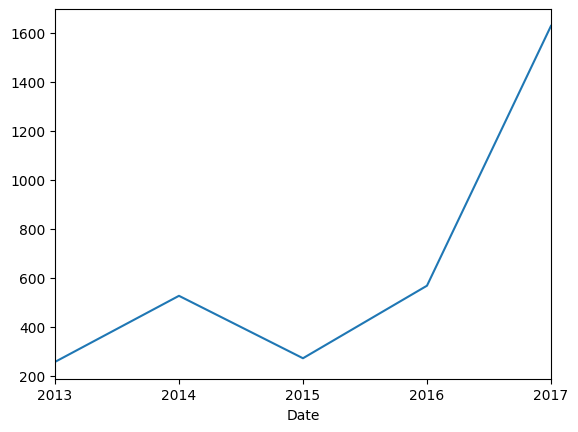

In [115]:
data['Close'].resample("YE").mean().plot(kind = "line")

<Axes: xlabel='Date'>

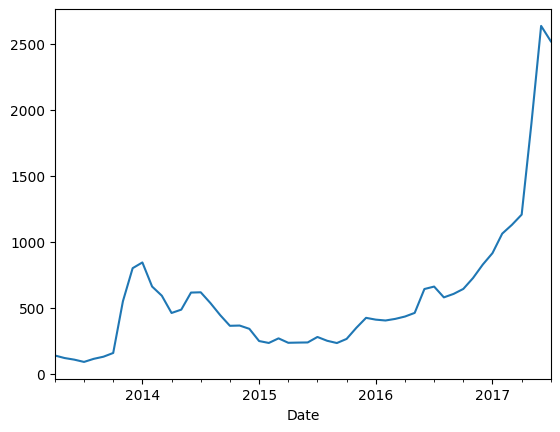

In [116]:
data['Close'].resample("ME").mean().plot(kind = "line")

<Axes: xlabel='Date'>

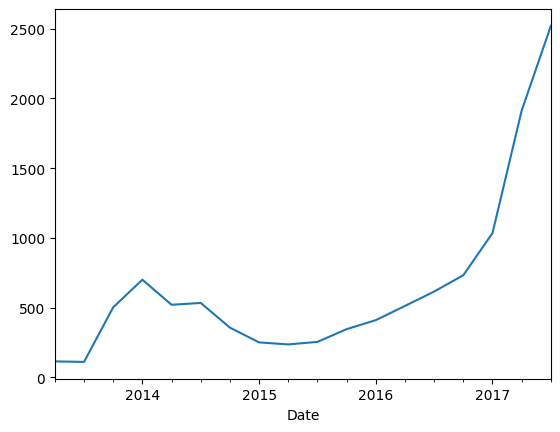

In [118]:
data['Close'].resample("QE").mean().plot(kind = "line")

<Axes: xlabel='Date'>

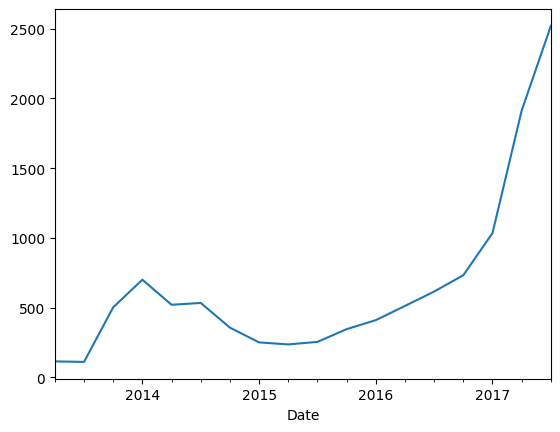

In [122]:
data['Close'].resample("QE").mean().plot(kind = "line")

Analysing Daily Change in closing price of Stocks

In [123]:
# We gonna see in percentage
data['Close']

Date
2013-04-28     134.21
2013-04-29     144.54
2013-04-30     139.00
2013-05-01     116.99
2013-05-02     105.21
               ...   
2017-07-27    2671.78
2017-07-28    2809.01
2017-07-29    2726.45
2017-07-30    2757.18
2017-07-31    2875.34
Name: Close, Length: 1556, dtype: float64

In [126]:
# to get this value in percentage we gonna multiply with 100
data["Close_price_pct_change"] = data['Close'].pct_change()* 100

In [127]:
data['Close_price_pct_change']

Date
2013-04-28          NaN
2013-04-29     7.696893
2013-04-30    -3.832849
2013-05-01   -15.834532
2013-05-02   -10.069237
                ...    
2017-07-27     5.626915
2017-07-28     5.136276
2017-07-29    -2.939114
2017-07-30     1.127107
2017-07-31     4.285538
Name: Close_price_pct_change, Length: 1556, dtype: float64

<Axes: xlabel='Date'>

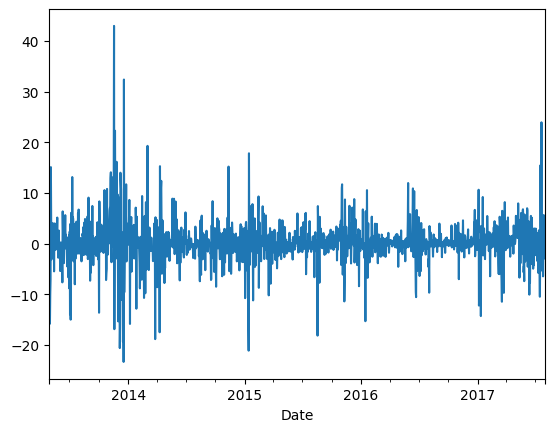

In [135]:
data['Close_price_pct_change'].plot(kind = "line")

In [136]:
# We gonna use cufflinks for better visualization for that we have to set proper plotly

import chart_studio.plotly as pt
import plotly.graph_objs as go
import plotly.express as px

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)

In [137]:
import cufflinks as cf

In [139]:
# to use cifflinks in offline mode
cf.go_offline()

In [148]:
type(data['Close_price_pct_change'])

pandas.core.series.Series

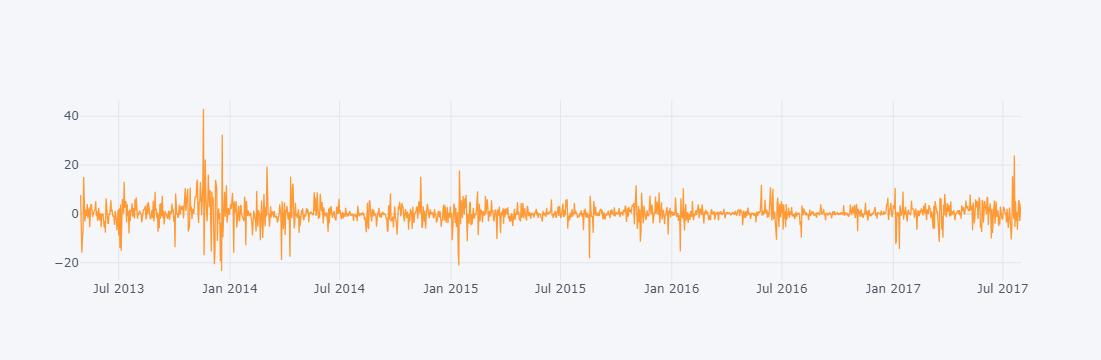

In [149]:
data['Close_price_pct_change'].iplot()